In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Feature Importances

In [2]:
deephit_importance = pd.read_csv('deep_hit_permutation_importance.csv')
deepsurv_importance = pd.read_csv('deep_surv_permutation_importance.csv')

In [18]:
importance_data

,Feature,DeepSurv,DeepHit
0,CREDIT_SCORE,-7.370921,-7.364522
1,ORIG_DTI_RATIO,-3.067559,-2.103488
2,ORIG_UPB,-0.600024,-0.940414
3,ORIG_LTV,-1.819527,-2.418488
4,ORIG_INTEREST_RATE,-2.863366,-0.811696
5,UPB_Share,-0.163687,-6.292050
6,TIMES_NOT_BEING_DELINQUENT,-0.710796,-0.636493
7,TIMES_BEING_DELINQUENT_30_DAYS,-4.883212,-6.406825
8,TIMES_BEING_DELINQUENT_60_DAYS,-0.983851,-2.877856


In [17]:
importance_data = pd.merge(deephit_importance, deepsurv_importance, on = 'Feature')
importance_data.columns = ['Feature', 'DeepSurv', 'DeepHit']

In [19]:
feature_names = ['fico.score','dti.r','orig.upb','ltv.r','int.rate','curr.upb','t.act.12m','t.del.30d.12m','t.del.60d.12m']

In [20]:
importance_data['Feature_Name'] = feature_names

In [33]:
importance_data['DeepSurv'] = importance_data['DeepSurv'].abs()
importance_data['DeepHit'] = importance_data['DeepHit'].abs()

### Plot Result

Text(0.5, 1.0, 'DeepHit')

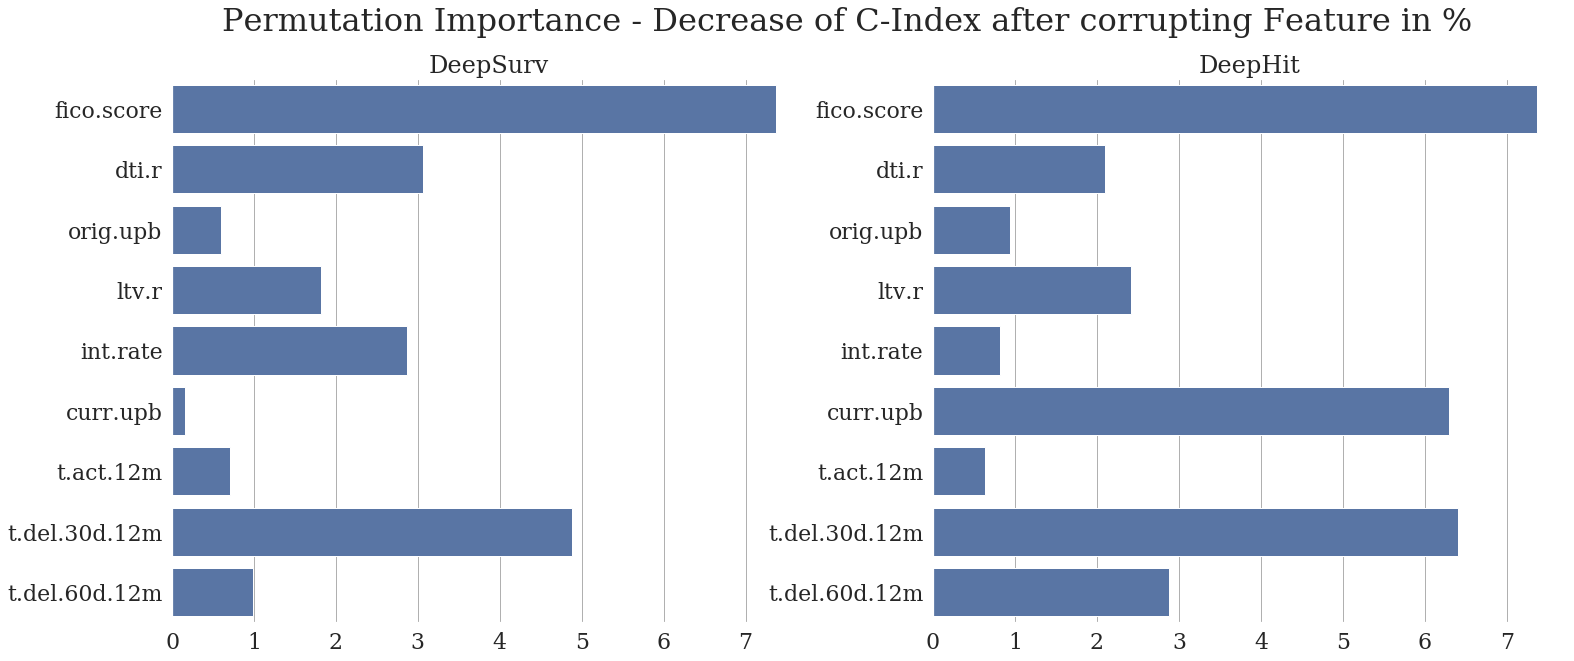

In [41]:
#https://matplotlib.org/stable/tutorials/introductory/customizing.html
sns.set(rc={'figure.figsize':(25,10),
            'font.family' : 'serif',
            'font.size' : 28,
           'axes.facecolor':'white',
           'axes.grid' :True,
           'axes.grid.axis': 'both', 
            'axes.grid.which': 'major',
           'grid.color':'b0b0b0'},
            font_scale=2)


fig, ax =plt.subplots(1,2)

sns.barplot(y='Feature_Name', x='DeepSurv', data=importance_data, orient='h', color='b',ax=ax[0])
sns.barplot(y='Feature_Name', x='DeepHit', data=importance_data, orient='h', color='b', ax=ax[1])

fig.suptitle('Permutation Importance - Decrease of C-Index after corrupting Feature in %', size=32)

ax[0].set(ylabel='', xlabel='')
ax[1].set(ylabel='', xlabel='')#, yticklabels=[]

ax[1].y_ticks = ''


ax[0].set_title('DeepSurv', size=24)
ax[1].set_title('DeepHit', size=24)